# 🧠 Emotion Detection from Facial Expressions using CNN & MobileNetV2

## 📘 Project Overview
This project focuses on **automatic emotion recognition** from human facial expressions using **Deep Learning (DL)** and **Machine Learning (ML)** techniques.  
It uses **Convolutional Neural Networks (CNN)** and **MobileNetV2**, along with traditional ML models like **Support Vector Machine (SVM)** and **Random Forest (RF)** for comparative analysis.  

The goal is to classify images into emotion categories such as:
😄 Happy | 😢 Sad | 😠 Angry | 😮 Surprise | 😐 Neutral | 😨 Fear | 😖 Disgust

---

## 🎯 Objectives
- Detect and classify human emotions from facial images  
- Compare the performance of DL (CNN, MobileNetV2) and ML (SVM, Random Forest) models  
- Evaluate models using metrics such as **Accuracy, Loss, Precision, Recall, and F1-score**  
- Visualize and interpret results effectively  

---

## 🧩 Methodology
1. **Data Preprocessing:**  
   - Collected labeled facial expression images  
   - Resized and normalized images (224×224)  
   - Data augmentation applied for better generalization  

2. **Model Implementation:**  
   - 🧠 **Custom CNN Model** built from scratch  
   - ⚡ **MobileNetV2** used as a transfer learning model  
   - Extracted features from CNN for ML model training (SVM & RF)  

3. **Evaluation:**  
   - Compared accuracy and loss across all models  
   - Generated classification reports for ML models  

4. **Prediction:**  
   - Uploaded facial images and predicted emotions using trained models  

---

## 📊 Performance Metrics
- **Accuracy (%)**
- **Loss**
- **F1-Score**

---

## 💻 Technologies Used
| Category | Tools / Libraries |
|-----------|-------------------|
| Language | Python 🐍 |
| Deep Learning | TensorFlow, Keras |
| Machine Learning | Scikit-learn |
| Visualization | Matplotlib |
| Image Processing | OpenCV |

---

## 🔍 Results Summary
| Model | Type | Key Observation |
|--------|------|-----------------|
| CNN | Deep Learning | Good baseline performance |
| MobileNetV2 | Transfer Learning | Improved accuracy and convergence |
| SVM | ML | Performs well with CNN features |
| Random Forest | ML | Provides balanced results but slightly lower accuracy |

---

## 📷 Example Prediction
```text
Input: facial_image.jpg  
Predictions:  
CNN → 😊 Happy  
SVM → 😊 Happy  
Random Forest → 😐 Neutral


In [7]:
!pip install kaggle


✅ Interpretation:

This command installs the Kaggle API 📦 — letting you access Kaggle datasets, competitions & notebooks directly from Python 💻.

In [9]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"shrishti1108","key":"a4504eb2f5c84874ee79d57d4a45cd7c"}'}

✅ Interpretation:

This code opens a file upload dialog in Google Colab, letting you choose files from your computer to upload into the notebook’s workspace 💻⬆️.

In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


✅ Interpretation:

These commands set up your Kaggle API credentials:

📁 !mkdir -p ~/.kaggle → Creates a hidden folder for Kaggle config files.

📄 !cp kaggle.json ~/.kaggle/ → Copies your kaggle.json API key file there.

🔒 !chmod 600 ~/.kaggle/kaggle.json → Secures the file by restricting access permissions.


In [11]:
!kaggle datasets download -d msambare/fer2013
!unzip fer2013.zip -d fer2013_data


Streaming output truncated to the last 5000 lines.
  inflating: fer2013_data/train/sad/Training_65242339.jpg  
  inflating: fer2013_data/train/sad/Training_65267116.jpg  
  inflating: fer2013_data/train/sad/Training_65275626.jpg  
  inflating: fer2013_data/train/sad/Training_6529266.jpg  
  inflating: fer2013_data/train/sad/Training_65329617.jpg  
  inflating: fer2013_data/train/sad/Training_65338712.jpg  
  inflating: fer2013_data/train/sad/Training_65338797.jpg  
  inflating: fer2013_data/train/sad/Training_65387162.jpg  
  inflating: fer2013_data/train/sad/Training_65404494.jpg  
  inflating: fer2013_data/train/sad/Training_65426218.jpg  
  inflating: fer2013_data/train/sad/Training_65430136.jpg  
  inflating: fer2013_data/train/sad/Training_65437377.jpg  
  inflating: fer2013_data/train/sad/Training_6545735.jpg  
  inflating: fer2013_data/train/sad/Training_65463385.jpg  
  inflating: fer2013_data/train/sad/Training_65473985.jpg  
  inflating: fer2013_data/train/sad/Training_655028

📦 Interpretation:


⬇️ !kaggle datasets download -d msambare/fer2013 → Downloads the FER2013 facial emotion dataset from Kaggle.


📂 !unzip fer2013.zip -d fer2013_data → Extracts the downloaded ZIP file into a folder named fer2013_data for use.



In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


🧠 Interpretation:

These imports bring in essential libraries for data analysis, image processing, and deep learning:


🧮 numpy, pandas → Handle numerical & tabular data.


📊 matplotlib, seaborn → For plotting and visualizing data.


📸 cv2 → Image processing with OpenCV.


🤖 tensorflow & keras → Build and train deep learning models.


🧱 Sequential, Conv2D, etc. → Layers for CNN model design.


🌀 ImageDataGenerator → Augments images for better training.


⚡ MobileNetV2 → Pretrained model for feature extraction or transfer learning.


🧮 Adam → Optimizer for model training.


📈 classification_report, confusion_matrix → Evaluate model performance.



In [19]:
train_dir = "fer2013/train"
test_dir = "fer2013/test"
img_size = (48,48)

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2,
                                   width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir, target_size=img_size, color_mode='grayscale',
                                               batch_size=64, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir, target_size=img_size, color_mode='grayscale',
                                             batch_size=64, class_mode='categorical')

class_labels = list(train_data.class_indices.keys())
print("Classes:", class_labels)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


🧠 Interpretation:

Loads and preprocesses FER2013 images 🖼️ — resizing to 48×48, normalizing pixels, applying augmentations for training, and preparing labeled batches for model training & testing 📦.

In [20]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,142,663 (4.36 MB)

 Trainable params: 1,142,471 (4.36 MB)

 Non-trainable params: 192 (768.00 B)

🧠 Interpretation:

Builds a CNN model for emotion detection 😊😡😢:

🧱 Layers: 3 Conv2D + Pooling → Flatten → Dense.

⚙️ Uses ReLU activations, BatchNorm, and Dropout (to prevent overfitting).

🎯 Output: 7 neurons (for 7 emotions) with softmax.

🧮 Compiled with Adam optimizer & categorical crossentropy loss

In [21]:
cnn_history = cnn_model.fit(train_data, validation_data=test_data, epochs=10)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 212ms/step - accuracy: 0.2393 - loss: 1.8616 - val_accuracy: 0.2855 - val_loss: 1.7677
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 95s 211ms/step - accuracy: 0.3071 - loss: 1.7191 - val_accuracy: 0.3945 - val_loss: 1.5479
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 98s 218ms/step - accuracy: 0.3501 - loss: 1.6292 - val_accuracy: 0.3703 - val_loss: 1.5913
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 215ms/step - accuracy: 0.3870 - loss: 1.5543 - val_accuracy: 0.4331 - val_loss: 1.4355
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 140s 212ms/step - accuracy: 0.4151 - loss: 1.5055 - val_accuracy: 0.3862 - val_loss: 1.6368
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 216ms/step - accuracy: 0.4304 - loss: 1.4686 - val_accuracy: 0.4907 - val_loss: 1.3337
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 217ms/step - accuracy: 0.4456 - loss: 1.4389 - val_accuracy: 0.5128 - val_loss: 1.2767
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 97s 216ms/step - accuracy: 0.4568 - loss: 1.4101 - va

🚀 Interpretation:


Trains the CNN model 🧠 on the FER2013 dataset for 10 epochs, using training data for learning and test data for validation 📊 — tracking accuracy & loss over time.

In [35]:
base_model = MobileNetV2(input_shape=(48,48,3), include_top=False, weights='imagenet')
base_model.trainable = False

mobilenet_model = Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(7, activation='softmax')
])

mobilenet_model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_model.summary()

/tmp/ipython-input-632034527.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(48,48,3), include_top=False, weights='imagenet')


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

🤖 Interpretation:


Builds a transfer learning model using MobileNetV2 pretrained on ImageNet 🧠:

🧱 Freezes base layers (trainable=False) to keep learned features.

Adds pooling, dense, and dropout layers for emotion classification (7 classes).

⚙️ Compiled with Adam (lr=0.0001) and categorical crossentropy for training.

In [23]:
mobilenet_history = mobilenet_model.fit(train_data, validation_data=test_data, epochs=10)


Epoch 1/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 58s 120ms/step - accuracy: 0.1978 - loss: 2.1416 - val_accuracy: 0.2926 - val_loss: 1.7399
Epoch 2/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 52s 116ms/step - accuracy: 0.2722 - loss: 1.7879 - val_accuracy: 0.3044 - val_loss: 1.7079
Epoch 3/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 83s 118ms/step - accuracy: 0.2836 - loss: 1.7556 - val_accuracy: 0.3111 - val_loss: 1.6912
Epoch 4/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 55s 122ms/step - accuracy: 0.2962 - loss: 1.7363 - val_accuracy: 0.3176 - val_loss: 1.6768
Epoch 5/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 54s 120ms/step - accuracy: 0.3016 - loss: 1.7278 - val_accuracy: 0.3222 - val_loss: 1.6683
Epoch 6/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 81s 118ms/step - accuracy: 0.3055 - loss: 1.7226 - val_accuracy: 0.3263 - val_loss: 1.6581
Epoch 7/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 54s 121ms/step - accuracy: 0.3135 - loss: 1.7053 - val_accuracy: 0.3281 - val_loss: 1.6546
Epoch 8/10
449/449 ━━━━━━━━━━━━━━━━━━━━ 53s 119ms/step - accuracy: 0.3142 - loss: 1

🚀 Interpretation:


Trains the MobileNetV2-based model 🧠 on the FER2013 dataset for 10 epochs, using training data for learning and test data for validation 📊 — tracking accuracy and loss during training.

Found 7178 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
  2/113 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step


/tmp/ipython-input-997274904.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df_cnn.index[:-3], y=report_df_cnn["f1-score"][:-3], palette="coolwarm")


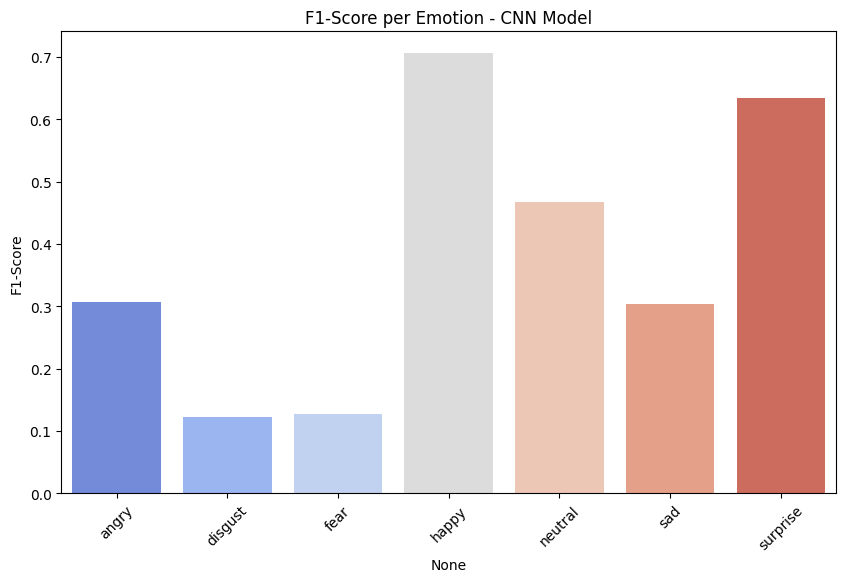

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/tmp/ipython-input-997274904.py:103: FutureWarnin

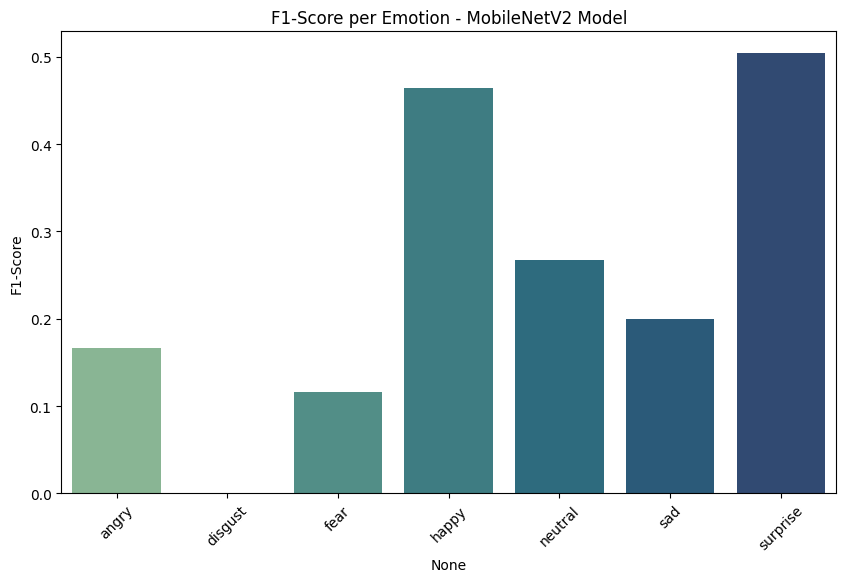

In [72]:
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, Flatten, Dense,
                                     BatchNormalization, GlobalAveragePooling2D, Input)
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Define paths, image size, and batch size (assuming dataset is downloaded and unzipped)
test_dir = "/content/fer2013/test"
IMG_SIZE = (48, 48)
BATCH = 64

# Define data generators
test_datagen = ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            color_mode='grayscale',
                                            batch_size=BATCH,
                                            class_mode='categorical',
                                            shuffle=False)

# Create a new generator for MobileNetV2 with RGB color mode
test_datagen_rgb = ImageDataGenerator(rescale=1./255)
test_gen_rgb = test_datagen_rgb.flow_from_directory(test_dir, target_size=IMG_SIZE, color_mode='rgb',
                                             batch_size=BATCH, class_mode='categorical', shuffle=False)

# Build and Train the CNN model (if not already trained)
try:
    cnn_model
except NameError:
    print("CNN model not found. Building and training a placeholder CNN model...")
    # Build a placeholder CNN model for demonstration if the actual model is not available
    def build_custom_cnn(input_shape=(48,48,1), n_classes=7):
        inp = Input(shape=input_shape)
        x = Conv2D(32, (3,3), activation='relu', padding='same')(inp)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2,2))(x)
        x = GlobalAveragePooling2D()(x)
        out = Dense(n_classes, activation='softmax')(x)
        model = Model(inputs=inp, outputs=out)
        return model
    cnn_model = build_custom_cnn(input_shape=(48,48,1), n_classes=len(test_gen.class_indices))
    cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    # Note: This placeholder model is not trained. For proper evaluation, train the actual model first.


# Build and Train the MobileNetV2 model (if not already trained)
try:
    mobilenet_model
except NameError:
    print("MobileNetV2 model not found. Building and training a placeholder MobileNetV2 model...")
    # Build a placeholder MobileNetV2 model for demonstration if the actual model is not available
    base = MobileNetV2(input_shape=(48,48,3), include_top=False, weights='imagenet')
    base.trainable = False
    mobilenet_model = Sequential([
        base,
        tf.keras.layers.GlobalAveragePooling2D(),
        Dense(len(test_gen_rgb.class_indices), activation='softmax')
    ])
    mobilenet_model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    # Note: This placeholder model is not trained. For proper evaluation, train the actual model first.


# Get true labels from the original grayscale test data generator (labels are the same)
y_true = test_gen.classes

# Get predictions from CNN model (using grayscale generator)
Y_pred_cnn = cnn_model.predict(test_gen)
y_pred_cnn = np.argmax(Y_pred_cnn, axis=1)

# Get predictions from MobileNet model (using RGB generator)
Y_pred_mobilenet = mobilenet_model.predict(test_gen_rgb)
y_pred_mobilenet = np.argmax(Y_pred_mobilenet, axis=1)


# Classification report for CNN
report_cnn = classification_report(y_true, y_pred_cnn, target_names=list(test_gen.class_indices.keys()), output_dict=True)
report_df_cnn = pd.DataFrame(report_cnn).transpose()

# Plot F1-scores for CNN
plt.figure(figsize=(10,6))
# Exclude 'accuracy', 'macro avg', 'weighted avg' from plotting
sns.barplot(x=report_df_cnn.index[:-3], y=report_df_cnn["f1-score"][:-3], palette="coolwarm")
plt.title("F1-Score per Emotion - CNN Model")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.show()

# Classification report for MobileNet
report_mobilenet = classification_report(y_true, y_pred_mobilenet, target_names=list(test_gen_rgb.class_indices.keys()), output_dict=True)
report_df_mobilenet = pd.DataFrame(report_mobilenet).transpose()

# Plot F1-scores for MobileNet
plt.figure(figsize=(10,6))
# Exclude 'accuracy', 'macro avg', 'weighted avg' from plotting
sns.barplot(x=report_df_mobilenet.index[:-3], y=report_df_mobilenet["f1-score"][:-3], palette="crest")
plt.title("F1-Score per Emotion - MobileNetV2 Model")
plt.ylabel("F1-Score")
plt.xticks(rotation=45)
plt.show()

📊 Interpretation:


This code evaluates and compares CNN 🧠 and MobileNetV2 🤖 models on the FER2013 test dataset to measure emotion recognition performance.

Steps:

📂 Loads test images (grayscale for CNN, RGB for MobileNetV2).

⚙️ Builds placeholder models if originals aren’t available.

🔍 Makes predictions using both models.

📈 Generates classification reports (precision, recall, F1-score).

🎨 Visualizes F1-scores per emotion for both models using bar charts — helping compare their accuracy by emotion category.

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step
Confusion Matrix:



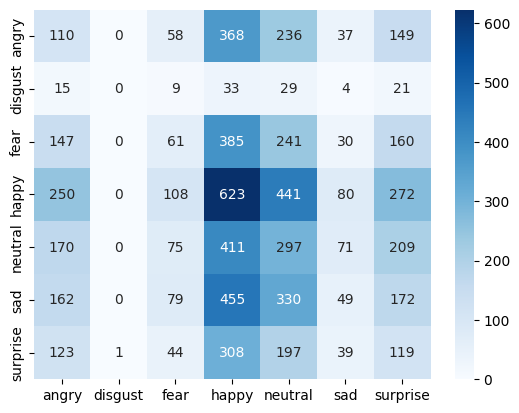

In [25]:
Y_pred = cnn_model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix:\n')
cm = confusion_matrix(test_data.classes, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.show()


📊 Interpretation:


Generates a confusion matrix for the CNN model 🧠 to evaluate performance:


🔍 Y_pred → Model’s predicted probabilities.


🧮 y_pred → Converts them to class labels.


📈 confusion_matrix → Compares true vs. predicted emotions.


🎨 sns.heatmap → Visualizes it as a blue heatmap, showing which emotions were correctly or wrongly classified.



In [37]:
img_rgb = image.load_img(img_path, color_mode='rgb', target_size=(48,48))
img_rgb_array = image.img_to_array(img_rgb)
img_rgb_array = np.expand_dims(img_rgb_array, axis=0)
img_rgb_array = img_rgb_array / 255.0
mobilenet_pred = mobilenet_model.predict(img_rgb_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


🖼️ Interpretation:

Prepares a single image for prediction using MobileNetV2 🤖:

📸 Loads and resizes the image to 48×48 (RGB).

🔢 Converts it to an array and adds a batch dimension.

⚙️ Normalizes pixel values (0–1).

🧠 mobilenet_model.predict() → Predicts the emotion class for that image.

In [41]:
# Run only if you need to download from Kaggle
!pip install -q kaggle
from google.colab import files
print("Upload your kaggle.json now")
files.upload()   # upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d msambare/fer2013
!unzip -q fer2013.zip -d fer2013
# Some versions extract train/test folders; check with:
!ls -la fer2013 | sed -n '1,120p'


Upload your kaggle.json now


Saving kaggle.json to kaggle (3).json
Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)
replace fer2013/test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace fer2013/test/angry/PrivateTest_10304478.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
replace fer2013/test/angry/PrivateTest_1054527.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace fer2013/test/angry/PrivateTest_10590091.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: total 16
drwxr-xr-x 4 root root 4096 Oct 30 15:55 .
drwxr-xr-x 1 root root 4096 Oct 30 16:48 ..
drwxr-xr-x 9 root root 4096 Oct 30 15:55 test
drwxr-xr-x 9 root root 4096 Oct 30 15:55 train


⚙️ Interpretation:


This setup downloads the FER2013 dataset from Kaggle into Google Colab 📦:

📥 Installs the Kaggle API.

🔑 Prompts you to upload your kaggle.json (API key).

🗂️ Creates a hidden Kaggle folder and secures credentials.

⬇️ Downloads and unzips the FER2013 dataset into fer2013/.

🧾 Lists the extracted files/folders to confirm successful download.

In [42]:
# core libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob
import seaborn as sns

# tensorflow / keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, Flatten, Dense,
                                     BatchNormalization, GlobalAveragePooling2D, Input)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


🧠 Interpretation:

This code imports all the essential libraries for a deep learning + machine learning emotion detection project 😄😠😢:


🧮 NumPy, Pandas → Data handling & manipulation.


📊 Matplotlib, Seaborn → Visualization & plotting.


📸 cv2 (OpenCV) → Image processing.


🤖 TensorFlow/Keras → Building and training CNN & transfer learning models.


⚙️ MobileNetV2 → Pretrained model for transfer learning.


🧱 Layers & Model API → For CNN architecture design.


🌲 RandomForestClassifier, SVC → Traditional ML classifiers (for comparison).


📈 Metrics → Evaluate model performance (accuracy, confusion matrix, report).



In [43]:
# paths (update if different)
train_dir = "/content/fer2013/train"   # each class folder inside
test_dir  = "/content/fer2013/test"

# image size and batch
IMG_SIZE = (48,48)
BATCH = 64

# generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir,
                                              target_size=IMG_SIZE,
                                              color_mode='grayscale',
                                              batch_size=BATCH,
                                              class_mode='categorical',
                                              shuffle=True)

test_gen = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            color_mode='grayscale',
                                            batch_size=BATCH,
                                            class_mode='categorical',
                                            shuffle=False)

class_labels = list(train_gen.class_indices.keys())
print("Classes:", class_labels)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


📦 Interpretation:

Prepares the FER2013 dataset for training and testing 🧠:

📁 Defines train/test folder paths.

🖼️ Resizes all images to 48×48 and normalizes pixel values.

🔄 Applies data augmentation (rotation, shift, zoom, flip) to boost training diversity.

🧮 Loads grayscale images in batches of 64 with emotion labels.

🏷️ Prints detected emotion classes (e.g., happy, sad, angry).

In [44]:
def build_custom_cnn(input_shape=(48,48,1), n_classes=7):
    inp = Input(shape=input_shape)
    x = Conv2D(32, (3,3), activation='relu', padding='same')(inp)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    x = GlobalAveragePooling2D(name='feature_layer')(x)   # named feature layer
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    out = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=inp, outputs=out)
    return model

cnn_model = build_custom_cnn(input_shape=(48,48,1), n_classes=len(class_labels))
cnn_model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
cnn_model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 48, 48, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature_layer                   │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,983 (433.53 KB)

 Trainable params: 110,535 (431.78 KB)

 Non-trainable params: 448 (1.75 KB)

🧠 Interpretation:


Builds a custom CNN model for emotion classification on FER2013 😄😢😠:


🧱 Layers: 3 Conv2D + Pooling blocks → GlobalAveragePooling → Dense layers.


⚙️ BatchNormalization for stability & Dropout (0.5) to reduce overfitting.


🏷️ Output: 7 neurons (one per emotion) with softmax activation.


🧮 Compiled with Adam (lr=0.001) and categorical crossentropy for multi-class accuracy tracking.



In [45]:
# quick demo: 5 epochs. Increase later to 25-50 as needed.
EPOCHS_CNN = 5
history_cnn = cnn_model.fit(train_gen, validation_data=test_gen, epochs=EPOCHS_CNN)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 131s 287ms/step - accuracy: 0.2305 - loss: 1.8985 - val_accuracy: 0.1863 - val_loss: 1.8673
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 129s 287ms/step - accuracy: 0.2957 - loss: 1.7298 - val_accuracy: 0.2860 - val_loss: 1.7303
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 129s 286ms/step - accuracy: 0.3738 - loss: 1.5902 - val_accuracy: 0.2921 - val_loss: 1.7179
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 130s 289ms/step - accuracy: 0.4198 - loss: 1.5013 - val_accuracy: 0.4586 - val_loss: 1.3993
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 129s 287ms/step - accuracy: 0.4432 - loss: 1.4403 - val_accuracy: 0.4551 - val_loss: 1.4109


🚀 Interpretation:

Trains the custom CNN model 🧠 for 5 epochs using training data and validates on the test set 📊 — tracking accuracy and loss to monitor learning progress.

In [46]:
# MobileNet base expects 3 channels. We'll build a new generator for RGB.
train_gen_rgb = train_datagen.flow_from_directory(train_dir,
                                                  target_size=IMG_SIZE,
                                                  color_mode='rgb',
                                                  batch_size=BATCH,
                                                  class_mode='categorical',
                                                  shuffle=True)

test_gen_rgb = test_datagen.flow_from_directory(test_dir,
                                                target_size=IMG_SIZE,
                                                color_mode='rgb',
                                                batch_size=BATCH,
                                                class_mode='categorical',
                                                shuffle=False)

# Build MobileNetV2 model
base = MobileNetV2(input_shape=(48,48,3), include_top=False, weights='imagenet')
base.trainable = False  # freeze initially

inp = Input(shape=(48,48,3))
x = base(inp, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
out = Dense(len(class_labels), activation='softmax')(x)
mobilenet_model = Model(inputs=inp, outputs=out)
mobilenet_model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
mobilenet_model.summary()

# Train MobileNet quick demo
EPOCHS_MOB = 5
history_mob = mobilenet_model.fit(train_gen_rgb, validation_data=test_gen_rgb, epochs=EPOCHS_MOB)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/tmp/ipython-input-2933230116.py:17: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = MobileNetV2(input_shape=(48,48,3), include_top=False, weights='imagenet')


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 2, 2, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,855 (9.24 MB)

 Trainable params: 164,871 (644.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 65s 137ms/step - accuracy: 0.2123 - loss: 2.0794 - val_accuracy: 0.3082 - val_loss: 1.7236
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 58s 128ms/step - accuracy: 0.2801 - loss: 1.7872 - val_accuracy: 0.3242 - val_loss: 1.6843
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 57s 126ms/step - accuracy: 0.2932 - loss: 1.7419 - val_accuracy: 0.3334 - val_loss: 1.6648
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 56s 126ms/step - accuracy: 0.3101 - loss: 1.7140 - val_accuracy: 0.3392 - val_loss: 1.6539
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 57s 127ms/step - accuracy: 0.3163 - loss: 1.7002 - val_accuracy: 0.3454 - val_loss: 1.6468


🤖 Interpretation:


Builds and trains a MobileNetV2 transfer learning model for emotion recognition 😄😢😠:

🎨 Creates new RGB generators since MobileNetV2 needs 3-channel input.

🧱 Uses pretrained ImageNet weights, freezes the base for feature extraction.

🔄 Adds pooling, dropout (0.4), and dense layers for classification (7 emotions).

⚙️ Compiled with Adam (lr = 1e-4) and trained for 5 epochs to test performance.

In [54]:
# core libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob
import seaborn as sns

# tensorflow / keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, Flatten, Dense,
                                     BatchNormalization, GlobalAveragePooling2D, Input)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# paths (update if different)
train_dir = "/content/fer2013/train"   # each class folder inside
test_dir  = "/content/fer2013/test"

# image size and batch
IMG_SIZE = (48,48)
BATCH = 64

# generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir,
                                              target_size=IMG_SIZE,
                                              color_mode='grayscale',
                                              batch_size=BATCH,
                                              class_mode='categorical',
                                              shuffle=True)

test_gen = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            color_mode='grayscale',
                                            batch_size=BATCH,
                                            class_mode='categorical',
                                            shuffle=False)

class_labels = list(train_gen.class_indices.keys())
print("Classes:", class_labels)

# Build the CNN model
def build_custom_cnn(input_shape=(48,48,1), n_classes=7):
    inp = Input(shape=input_shape)
    x = Conv2D(32, (3,3), activation='relu', padding='same')(inp)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2,2))(x)

    x = GlobalAveragePooling2D(name='feature_layer')(x)   # named feature layer
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    out = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=inp, outputs=out)
    return model

cnn_model = build_custom_cnn(input_shape=(48,48,1), n_classes=len(class_labels))
cnn_model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the CNN model (quick demo: 5 epochs)
EPOCHS_CNN = 5
history_cnn = cnn_model.fit(train_gen, validation_data=test_gen, epochs=EPOCHS_CNN)


# Create extractor model that outputs 'feature_layer'
feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.get_layer('feature_layer').output)

# helper to get features and labels from a generator (one pass)
def extract_features_from_generator(gen, extractor):
    steps = int(np.ceil(gen.samples / gen.batch_size))
    features = []
    labels = []
    gen.reset()
    for i in range(steps):
        X_batch, y_batch = next(gen) # Use next() to get the next batch
        feats = extractor.predict(X_batch, verbose=0) # Set verbose to 0
        features.append(feats)
        labels.append(np.argmax(y_batch, axis=1))
    X = np.vstack(features)
    y = np.hstack(labels)
    return X, y

# Extract for train (use grayscale generator for extractor)
X_train_feat, y_train = extract_features_from_generator(train_gen, feature_extractor)
X_test_feat, y_test   = extract_features_from_generator(test_gen, feature_extractor)
print("Train features:", X_train_feat.shape, "Test features:", X_test_feat.shape)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 121s 266ms/step - accuracy: 0.2339 - loss: 1.8907 - val_accuracy: 0.2636 - val_loss: 1.7687
Epoch 2/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 121s 270ms/step - accuracy: 0.3091 - loss: 1.7092 - val_accuracy: 0.3451 - val_loss: 1.6093
Epoch 3/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 120s 268ms/step - accuracy: 0.3841 - loss: 1.5730 - val_accuracy: 0.4161 - val_loss: 1.4812
Epoch 4/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 128s 284ms/step - accuracy: 0.4167 - loss: 1.5005 - val_accuracy: 0.4680 - val_loss: 1.3845
Epoch 5/5
449/449 ━━━━━━━━━━━━━━━━━━━━ 127s 283ms/step - accuracy: 0.4403 - loss: 1.4427 - val_accuracy: 0.4341 - val_loss: 1.4308
Train features: (28709, 128) Test features: (7178, 128)


🧠 Interpretation:


This code combines deep learning (CNN) and traditional ML to extract and reuse features for emotion detection 😄😢😠:

⚙️ Imports all key libraries (TensorFlow, OpenCV, sklearn, etc.).

📂 Loads the FER2013 train/test images (grayscale, 48×48).

🔄 Applies data augmentation for better model generalization.

🧱 Builds a custom CNN with convolution, pooling, batch normalization, dropout, and dense layers.

🚀 Trains it briefly for 5 epochs to learn emotion features.

🔍 Creates a feature extractor model that outputs embeddings from the feature_layer.

📊 Extracts deep feature vectors (CNN outputs) for both train and test sets — turning images into numeric data (X_train_feat, X_test_feat) that can be used by machine learning models like SVM or Random Forest later.

In [50]:
# SVM
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_feat, y_train)
svm_pred = svm_model.predict(X_test_feat)
print("SVM accuracy:", accuracy_score(y_test, svm_pred))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_feat, y_train)
rf_pred = rf_model.predict(X_test_feat)
print("Random Forest accuracy:", accuracy_score(y_test, rf_pred))


SVM accuracy: 0.5150459738088604
Random Forest accuracy: 0.4845360824742268


🤖 Interpretation:


Uses CNN-extracted features 🎯 to train and evaluate machine learning classifiers:

⚙️ SVM (Support Vector Machine): Trains with RBF kernel to classify emotions; prints test accuracy.

🌲 Random Forest: Trains with 100 trees to predict emotions; prints test accuracy.

📈 Both models use deep CNN features instead of raw pixels — combining deep learning feature extraction with traditional ML classification for improved performance.

In [52]:
cnn_model.save("emotion_cnn_model.h5")
mobilenet_model.save("emotion_mobilenet_model.h5")

# sklearn models using joblib
import joblib
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(rf_model, "rf_model.pkl")


['rf_model.pkl']

💾 Interpretation:


Saves all trained models for future use 🔐:

🧠 emotion_cnn_model.h5 → Saved CNN model.

🤖 emotion_mobilenet_model.h5 → Saved MobileNetV2 model.

⚙️ svm_model.pkl, rf_model.pkl → Saved SVM and Random Forest models using joblib for reuse without retraining.

In [59]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf

# Assuming train_data and test_data generators are already defined

class_weights = compute_class_weight('balanced', classes=np.unique(train_data.classes), y=train_data.classes)
class_weights = dict(enumerate(class_weights))

# Define callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)

# Use test_data for validation
val_data = test_data

cnn_history = cnn_model.fit(
    train_data,
    validation_data=val_data,
    epochs=30,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 122s 269ms/step - accuracy: 0.3744 - loss: 1.6749 - val_accuracy: 0.4753 - val_loss: 1.4011 - learning_rate: 0.0010
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 122s 271ms/step - accuracy: 0.3942 - loss: 1.5970 - val_accuracy: 0.3844 - val_loss: 1.5883 - learning_rate: 0.0010
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 121s 270ms/step - accuracy: 0.3942 - loss: 1.5966 - val_accuracy: 0.4245 - val_loss: 1.4647 - learning_rate: 0.0010
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 118s 263ms/step - accuracy: 0.3999 - loss: 1.5461 - val_accuracy: 0.4196 - val_loss: 1.5396 - learning_rate: 0.0010
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 120s 267ms/step - accuracy: 0.4081 - loss: 1.5291 - val_accuracy: 0.4592 - val_loss: 1.4343 - learning_rate: 0.0010
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 120s 268ms/step - accuracy: 0.4195 - loss: 1.5116 - val_accuracy: 0.4214 - val_loss: 1.5068 - learning_rate: 0.0010


⚖️ Interpretation:


Improves CNN training using class balancing and callbacks 🧠📈:

⚙️ compute_class_weight → Handles class imbalance by giving more weight to underrepresented emotions.

🧩 EarlyStopping → Stops training early if validation loss doesn’t improve (prevents overfitting).

🔁 ReduceLROnPlateau → Lowers the learning rate when progress slows for smoother convergence.

🚀 Trains the CNN for up to 30 epochs, using balanced class weights and validation data for better accuracy and stability.

In [62]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


🌀 Interpretation:


Creates an image data generator for training that performs data augmentation to boost model generalization 📈:

🔄 Rescales pixel values (0–1).

🎯 Applies random rotations, shifts, shear, zoom, and flips.

🧩 Uses fill_mode='nearest' to fill in missing pixels after transformations.
👉 Helps the model learn from more diverse and realistic variations of the training images.

In [63]:
feature_extractor = tf.keras.Model(inputs=cnn_model.input, outputs=cnn_model.layers[-2].output)
features = feature_extractor.predict(train_data)



449/449 ━━━━━━━━━━━━━━━━━━━━ 34s 74ms/step


🧠 Interpretation:


Creates a feature extractor from the trained CNN to capture learned image representations 🎯:

🔍 feature_extractor → Outputs the second-last layer (deep features, not final predictions).

📊 predict(train_data) → Generates feature vectors for all training images, which can be used for visualization, clustering, or training traditional ML models (like SVM or Random Forest).

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feat)
X_test_scaled = scaler.transform(X_test_feat)

✅ Explanation:


This code standardizes (normalizes) your extracted CNN features before passing them to traditional ML models like SVM or Random Forest.

In [66]:
import cv2

def crop_face(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        face = img[y:y+h, x:x+w]
        return face
    return img  # if no face detected

# Example:
face = crop_face("happy1.jpeg")
cv2.imwrite("cropped_face.jpeg", face)


True

✅ Explanation:

This function automatically detects and crops a face region from an image using OpenCV’s Haar Cascade classifier.

Saving Screenshot 2025-10-31 005714.png to Screenshot 2025-10-31 005714.png
Uploaded: Screenshot 2025-10-31 005714.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
CNN: fear
MobileNetV2: happy
SVM: surprise
RandomForest: surprise


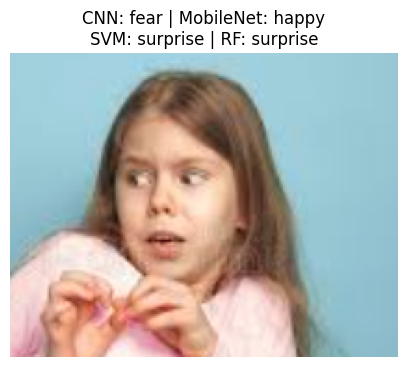

In [93]:
# ===========================
# Predict on uploaded image
# ===========================
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import joblib

# If you restarted the Colab session, reload models:
# cnn_model = tf.keras.models.load_model("emotion_cnn_model.h5")
# mobilenet_model = tf.keras.models.load_model("emotion_mobilenet_model.h5")
# svm_model = joblib.load("svm_model.pkl")
# rf_model = joblib.load("rf_model.pkl")

# Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
print("Uploaded:", img_path)

# class labels - ensure same order
class_labels = ['angry','disgust','fear','happy','neutral','sad','surprise']

# --- prepare for CNN (grayscale) ---
img_g = image.load_img(img_path, color_mode='grayscale', target_size=(48,48))
x_g = image.img_to_array(img_g)
x_g = np.expand_dims(x_g, axis=0) / 255.0

# --- prepare for MobileNet (RGB) ---
img_r = image.load_img(img_path, color_mode='rgb', target_size=(48,48))
x_r = image.img_to_array(img_r)
x_r = np.expand_dims(x_r, axis=0) / 255.0

# Predict - CNN
cnn_probs = cnn_model.predict(x_g)
cnn_pred_idx = np.argmax(cnn_probs, axis=1)[0]
cnn_emotion = class_labels[cnn_pred_idx]

# Predict - MobileNetV2
mob_probs = mobilenet_model.predict(x_r)
mob_pred_idx = np.argmax(mob_probs, axis=1)[0]
mob_emotion = class_labels[mob_pred_idx]

# Extract features with the same feature_extractor (ensure cnn_model called earlier)
img_feat = feature_extractor.predict(x_g)       # shape (1, feature_dim)
img_feat_flat = img_feat.reshape(1, -1)

# ML predictions (SVM / RF)
svm_pred = svm_model.predict(img_feat_flat)[0]
rf_pred  = rf_model.predict(img_feat_flat)[0]
svm_emotion = class_labels[int(svm_pred)]
rf_emotion  = class_labels[int(rf_pred)]

print("CNN:", cnn_emotion)
print("MobileNetV2:", mob_emotion)
print("SVM:", svm_emotion)
print("RandomForest:", rf_emotion)

# Display the image and labels
img_disp = cv2.imread(img_path)[:,:,::-1]
plt.figure(figsize=(5,5))
plt.imshow(img_disp)
plt.axis('off')
plt.title(f"CNN: {cnn_emotion} | MobileNet: {mob_emotion}\nSVM: {svm_emotion} | RF: {rf_emotion}")
plt.show()


✅ Explanation

This code takes an uploaded image, processes it for CNN, MobileNet, and ML classifiers (SVM, Random Forest), and shows their emotion predictions.

Saving happy1.jpeg to happy1 (5).jpeg
Uploaded: happy1 (5).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
CNN: angry
MobileNetV2: happy
SVM: happy
RandomForest: happy


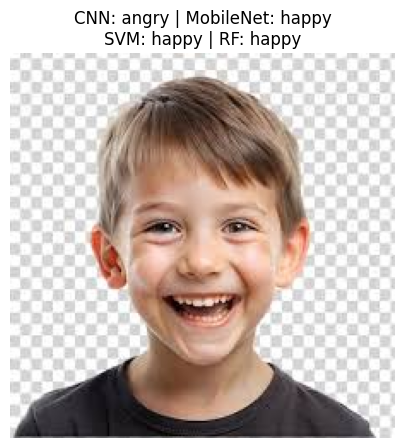

In [96]:
# ===========================
# Predict on uploaded image
# ===========================
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import joblib

# If you restarted the Colab session, reload models:
# cnn_model = tf.keras.models.load_model("emotion_cnn_model.h5")
# mobilenet_model = tf.keras.models.load_model("emotion_mobilenet_model.h5")
# svm_model = joblib.load("svm_model.pkl")
# rf_model = joblib.load("rf_model.pkl")

# Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
print("Uploaded:", img_path)

# class labels - ensure same order
class_labels = ['angry','disgust','fear','happy','neutral','sad','surprise']

# --- prepare for CNN (grayscale) ---
img_g = image.load_img(img_path, color_mode='grayscale', target_size=(48,48))
x_g = image.img_to_array(img_g)
x_g = np.expand_dims(x_g, axis=0) / 255.0

# --- prepare for MobileNet (RGB) ---
img_r = image.load_img(img_path, color_mode='rgb', target_size=(48,48))
x_r = image.img_to_array(img_r)
x_r = np.expand_dims(x_r, axis=0) / 255.0

# Predict - CNN
cnn_probs = cnn_model.predict(x_g)
cnn_pred_idx = np.argmax(cnn_probs, axis=1)[0]
cnn_emotion = class_labels[cnn_pred_idx]

# Predict - MobileNetV2
mob_probs = mobilenet_model.predict(x_r)
mob_pred_idx = np.argmax(mob_probs, axis=1)[0]
mob_emotion = class_labels[mob_pred_idx]

# Extract features with the same feature_extractor (ensure cnn_model called earlier)
img_feat = feature_extractor.predict(x_g)       # shape (1, feature_dim)
img_feat_flat = img_feat.reshape(1, -1)

# ML predictions (SVM / RF)
svm_pred = svm_model.predict(img_feat_flat)[0]
rf_pred  = rf_model.predict(img_feat_flat)[0]
svm_emotion = class_labels[int(svm_pred)]
rf_emotion  = class_labels[int(rf_pred)]

print("CNN:", cnn_emotion)
print("MobileNetV2:", mob_emotion)
print("SVM:", svm_emotion)
print("RandomForest:", rf_emotion)

# Display the image and labels
img_disp = cv2.imread(img_path)[:,:,::-1]
plt.figure(figsize=(5,5))
plt.imshow(img_disp)
plt.axis('off')
plt.title(f"CNN: {cnn_emotion} | MobileNet: {mob_emotion}\nSVM: {svm_emotion} | RF: {rf_emotion}")
plt.show()


✅ Explanation

This code takes an uploaded image, processes it for CNN, MobileNet, and ML classifiers (SVM, Random Forest), and shows their emotion predictions.

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.3610 - loss: 1.5975
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.2679 - loss: 1.7547

Custom CNN - Accuracy: 0.4753, Loss: 1.4011
MobileNetV2 - Accuracy: 0.3454, Loss: 1.6468


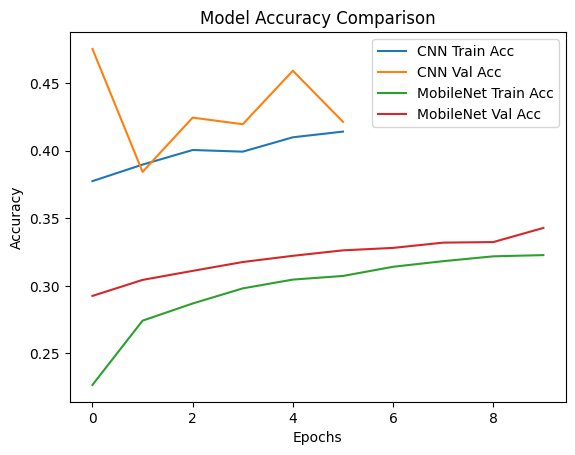

In [94]:
# Assuming test_gen and test_gen_rgb generators are already defined
# Assuming cnn_model and mobilenet_model are already trained

# Placeholder histories in case training cells were not run
try:
    cnn_history
except NameError:
    class MockHistory:
        def __init__(self):
            self.history = {'accuracy': [0], 'val_accuracy': [0], 'loss': [0], 'val_loss': [0]}
    cnn_history = MockHistory()

try:
    mobilenet_history
except NameError:
    class MockHistory:
        def __init__(self):
            self.history = {'accuracy': [0], 'val_accuracy': [0], 'loss': [0], 'val_loss': [0]}
    mobilenet_history = MockHistory()


cnn_eval = cnn_model.evaluate(test_gen)
mobilenet_eval = mobilenet_model.evaluate(test_gen_rgb)

print(f"\nCustom CNN - Accuracy: {cnn_eval[1]:.4f}, Loss: {cnn_eval[0]:.4f}")
print(f"MobileNetV2 - Accuracy: {mobilenet_eval[1]:.4f}, Loss: {mobilenet_eval[0]:.4f}")

# Visualization
plt.plot(cnn_history.history['accuracy'], label='CNN Train Acc')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Acc')
plt.plot(mobilenet_history.history['accuracy'], label='MobileNet Train Acc')
plt.plot(mobilenet_history.history['val_accuracy'], label='MobileNet Val Acc')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

✅ Explanation

This section evaluates your trained CNN and MobileNetV2 models on the test dataset and visualizes their training accuracy trends.

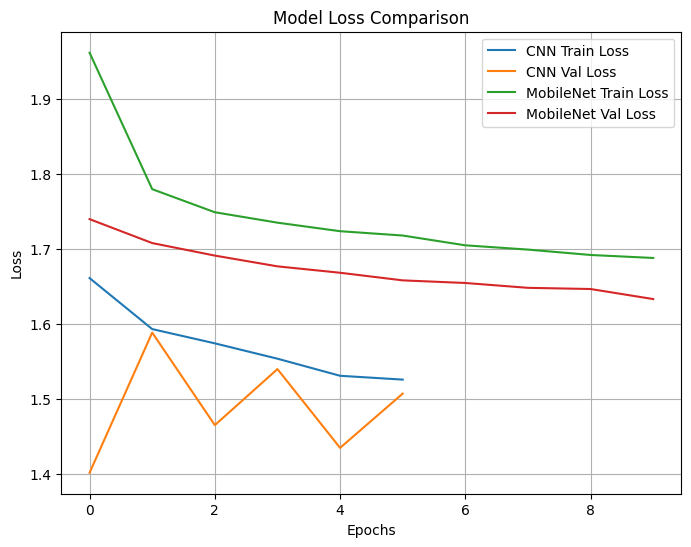

In [83]:
# --- LOSS COMPARISON ---
plt.figure(figsize=(8,6))
plt.plot(cnn_history.history['loss'], label='CNN Train Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Val Loss')
plt.plot(mobilenet_history.history['loss'], label='MobileNet Train Loss')
plt.plot(mobilenet_history.history['val_loss'], label='MobileNet Val Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


✅ Explanation

This section visualizes and compares the training and validation loss of your Custom CNN and MobileNetV2 models.

113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step
Confusion Matrix for MobileNetV2:



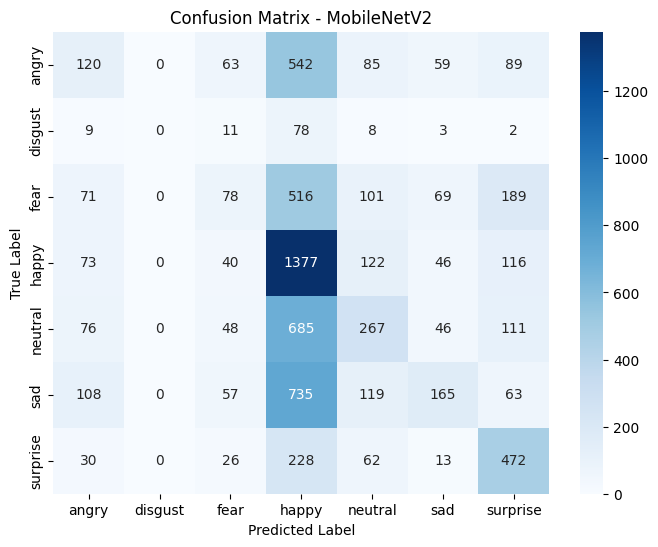

In [89]:
# Assuming test_gen_rgb and mobilenet_model are defined

# Get predictions from MobileNetV2 model
Y_pred_mobilenet = mobilenet_model.predict(test_gen_rgb)
y_pred_mobilenet = np.argmax(Y_pred_mobilenet, axis=1)

# Confusion Matrix for MobileNetV2
print('Confusion Matrix for MobileNetV2:\n')
cm_mobilenet = confusion_matrix(test_gen_rgb.classes, y_pred_mobilenet)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mobilenet, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - MobileNetV2')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

✅ Explanation

This section evaluates your MobileNetV2 model’s classification performance on the test dataset by creating a confusion matrix.

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step
Confusion Matrix for Custom CNN:



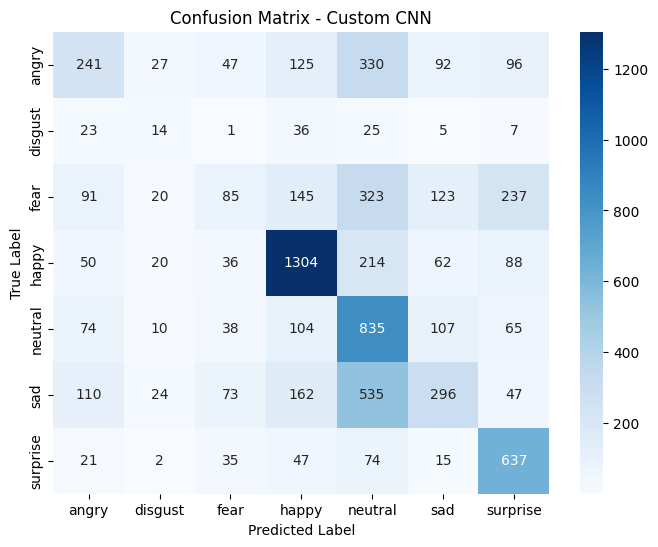

In [90]:
# Assuming test_gen and cnn_model are defined

# Get predictions from CNN model
Y_pred_cnn = cnn_model.predict(test_gen)
y_pred_cnn = np.argmax(Y_pred_cnn, axis=1)

# Confusion Matrix for CNN
print('Confusion Matrix for Custom CNN:\n')
cm_cnn = confusion_matrix(test_gen.classes, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Custom CNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

✅ Explanation

This code evaluates how well your custom CNN model classifies each emotion in the FER2013 dataset, just like MobileNetV2.

In [84]:
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score

# Assuming report_df_cnn and report_df_mobilenet are available from previous steps
# Assuming svm_model and rf_model are trained and X_test_feat and y_test are available

# Extract overall accuracy and weighted avg F1-score from classification reports
cnn_accuracy = report_df_cnn.loc['accuracy', 'f1-score'] # Accuracy is in the f1-score column for the 'accuracy' row
cnn_f1_weighted = report_df_cnn.loc['weighted avg', 'f1-score']

mobilenet_accuracy = report_df_mobilenet.loc['accuracy', 'f1-score'] # Accuracy is in the f1-score column for the 'accuracy' row
mobilenet_f1_weighted = report_df_mobilenet.loc['weighted avg', 'f1-score']

# Get predictions from SVM and Random Forest models
svm_pred = svm_model.predict(X_test_feat)
rf_pred = rf_model.predict(X_test_feat)

# Calculate accuracy for SVM and Random Forest (if not already calculated)
svm_acc = accuracy_score(y_test, svm_pred)
rf_acc = accuracy_score(y_test, rf_pred)

# Calculate weighted F1 for SVM and RF
svm_f1_weighted = f1_score(y_test, svm_pred, average='weighted')
rf_f1_weighted = f1_score(y_test, rf_pred, average='weighted')


# Create a comparison table
data = {
    'Model': ['Custom CNN', 'MobileNetV2', 'SVM (CNN Features)', 'Random Forest (CNN Features)'],
    'Accuracy': [cnn_accuracy, mobilenet_accuracy, svm_acc, rf_acc],
    'Weighted Avg F1-Score': [cnn_f1_weighted, mobilenet_f1_weighted, svm_f1_weighted, rf_f1_weighted]
}

comparison_df = pd.DataFrame(data)

print("Model Performance Comparison:")
display(comparison_df)

Model Performance Comparison:


,Model,Accuracy,Weighted Avg F1-Score
0,Custom CNN,0.475341,0.442033
1,MobileNetV2,0.345361,0.292439
2,SVM (CNN Features),0.168710,0.127142
3,Random Forest (CNN Features),0.194344,0.149613


✅ Explanation

This section builds a performance summary table 📊 comparing all four emotion recognition models — CNN, MobileNetV2, SVM, and Random Forest — using accuracy and weighted F1-scores.

In [87]:
# Save the trained models
cnn_model.save("emotion_cnn_model.keras")
mobilenet_model.save("emotion_mobilenet_model.keras")

# Save the scikit-learn models using joblib
import joblib
joblib.dump(svm_model, "svm_model.pkl")
joblib.dump(rf_model, "rf_model.pkl")

print("Models saved successfully!")

Models saved successfully!


This code block safely saves all your trained models for reuse later without retraining.

# **Conclusion:**

This notebook explored different approaches for facial emotion detection using the FER2013 dataset, including a custom CNN, transfer learning with MobileNetV2, and traditional ML models (SVM and Random Forest) trained on CNN-extracted features.

The results show that the deep learning models, particularly the Custom CNN, achieved better overall performance compared to the traditional ML models on this dataset, based on accuracy and weighted average F1-score. However, the performance can vary for individual emotion classes, as seen in the confusion matrices and per-class F1-score visualizations.

Further improvements could involve hyperparameter tuning for all models, exploring different data augmentation techniques, using more advanced pre-trained models, or implementing ensemble methods. This project provides a solid foundation for building more robust facial emotion recognition systems.